# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [8]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 605


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [9]:
# Set the API base URL
url = f"https://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&units=metric"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}&q={city}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | taiohae
City not found. Skipping...
Processing Record 2 of Set 1 | chiredzi
Processing Record 3 of Set 1 | gorom-gorom
Processing Record 4 of Set 1 | west bay
Processing Record 5 of Set 1 | karratha
Processing Record 6 of Set 1 | lebu
Processing Record 7 of Set 1 | waitangi
Processing Record 8 of Set 1 | aasiaat
Processing Record 9 of Set 1 | talnakh
Processing Record 10 of Set 1 | thompson
Processing Record 11 of Set 1 | petropavlovsk-kamchatsky
Processing Record 12 of Set 1 | ataq
Processing Record 13 of Set 1 | lukolela
Processing Record 14 of Set 1 | puerto san carlos
City not found. Skipping...
Processing Record 15 of Set 1 | moyynkum
Processing Record 16 of Set 1 | port-aux-francais
Processing Record 17 of Set 1 | edinburgh of the seven seas
Processing Record 18 of Set 1 | port alfred
Processing Record 19 of Set 1 | atafu village
Processing Record 20 of Set 1 | kapuskasing
Processing Record

In [10]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          574
Lat           574
Lng           574
Max Temp      574
Humidity      574
Cloudiness    574
Wind Speed    574
Country       574
Date          574
dtype: int64

In [11]:
city_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 574 entries, 0 to 573
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        574 non-null    object 
 1   Lat         574 non-null    float64
 2   Lng         574 non-null    float64
 3   Max Temp    574 non-null    float64
 4   Humidity    574 non-null    int64  
 5   Cloudiness  574 non-null    int64  
 6   Wind Speed  574 non-null    float64
 7   Country     574 non-null    object 
 8   Date        574 non-null    int64  
dtypes: float64(4), int64(3), object(2)
memory usage: 40.5+ KB


In [12]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,chiredzi,-21.0500,31.6667,31.02,6,0,2.78,ZW,1717590333
1,gorom-gorom,14.4439,-0.2361,39.99,26,40,6.37,BF,1717590334
2,west bay,19.3667,-81.4167,29.48,87,20,1.54,KY,1717590334
3,karratha,-20.7377,116.8463,21.71,54,0,3.03,AU,1717590335
4,lebu,-37.6167,-73.6500,13.26,97,100,7.33,CL,1717590335


In [13]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [14]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,chiredzi,-21.0500,31.6667,31.02,6,0,2.78,ZW,1717590333
1,gorom-gorom,14.4439,-0.2361,39.99,26,40,6.37,BF,1717590334
2,west bay,19.3667,-81.4167,29.48,87,20,1.54,KY,1717590334
3,karratha,-20.7377,116.8463,21.71,54,0,3.03,AU,1717590335
4,lebu,-37.6167,-73.6500,13.26,97,100,7.33,CL,1717590335


In [15]:
time.strftime('%Y-%m-%d', time.localtime(city_data_df["Date"].min()))

'2024-06-05'

In [16]:
time.strftime('%Y-%m-%d', time.localtime(city_data_df["Date"].max()))

'2024-06-05'

In [17]:
city_data_df["Max Temp"].std()

9.338911887548015

In [18]:
help(plt.annotate)

Help on function annotate in module matplotlib.pyplot:

annotate(text: 'str', xy: 'tuple[float, float]', xytext: 'tuple[float, float] | None' = None, xycoords: 'str | Artist | Transform | Callable[[RendererBase], Bbox | Transform] | tuple[float, float]' = 'data', textcoords: 'str | Artist | Transform | Callable[[RendererBase], Bbox | Transform] | tuple[float, float] | None' = None, arrowprops: 'dict[str, Any] | None' = None, annotation_clip: 'bool | None' = None, **kwargs) -> 'Annotation'
    Annotate the point *xy* with text *text*.
    
    In the simplest form, the text is placed at *xy*.
    
    Optionally, the text can be displayed in another position *xytext*.
    An arrow pointing from the text to the annotated point *xy* can then
    be added by defining *arrowprops*.
    
    Parameters
    ----------
    text : str
        The text of the annotation.
    
    xy : (float, float)
        The point *(x, y)* to annotate. The coordinate system is determined
        by *xycoords*

### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

In [109]:
def scatter_or_linear_reg_plots(x_values: pd.Series, y_values: pd.Series, x_name: str, y_name: str, regress=False, plot_name="", save_as="") -> None:
	# Incorporate graph properties 
	plt.xlabel(x_name)
	plt.ylabel(y_name)
	plt.xlim(min(x_values.values)-5, max(x_values.values)+5)
	plt.ylim(min(y_values.values)-2, max(y_values.values)+2)

	# If linear regression is involved, then perform the calculations without saving the figure as an image file; otherwise, just save the scatter plot.
	if regress:
		# Build scatter plot.
		plt.scatter(x_values.values, y_values.values, c="tab:blue")
		#linear regregression here.
		(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values.values, y_values.values)
		regress_values = x_values * slope + intercept
		line_eq = f"y = {round(slope, 2)}x + {round(intercept, 2)}"
		plt.plot(x_values,regress_values,"r-", label=line_eq)
		# Incorporate annotation, which is actually a legend label.
		plt.legend(frameon=False, handlelength=0, loc='best', labelcolor='red', fontsize=15)
		print(f"The r-value is: {rvalue}")
	else:
		# Build scatter plot.
		plt.scatter(x_values.values, y_values.values, c="tab:blue", edgecolors="black")
		# Incorporate the title and grids
		plt.title(f"{plot_name} ({time.strftime('%Y-%m-%d', time.localtime(city_data_df['Date'].min()))})")
		plt.grid(True)
		# Save the figure
		plt.savefig(save_as)

	# Show plot
	plt.show()

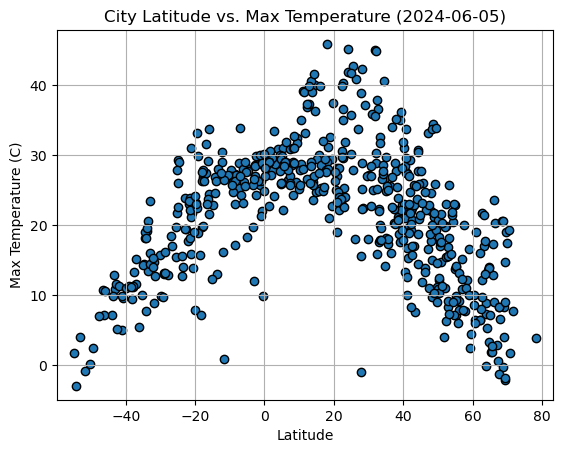

In [21]:
scatter_or_linear_reg_plots(city_data_df["Lat"], city_data_df["Max Temp"], "Latitude", "Max Temperature (C)",
                            plot_name="City Latitude vs. Max Temperature", save_as="output_data/Fig1.png")


#### Latitude Vs. Humidity

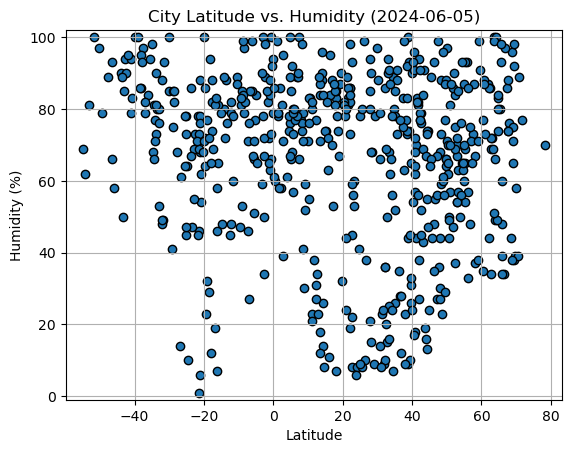

In [22]:
scatter_or_linear_reg_plots(city_data_df["Lat"], city_data_df["Humidity"], "Latitude", "Humidity (%)",
                            plot_name="City Latitude vs. Humidity", save_as="output_data/Fig2.png")


#### Latitude Vs. Cloudiness

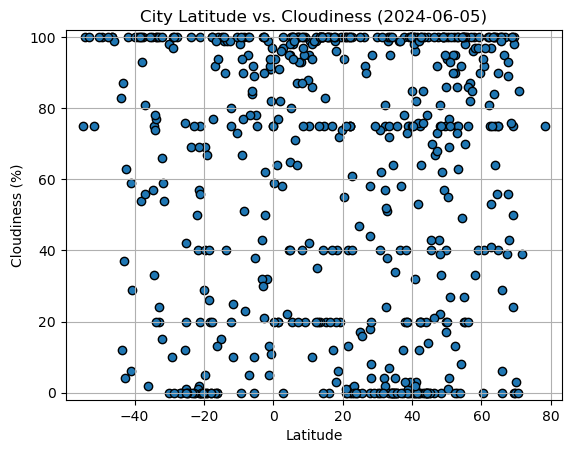

In [23]:
scatter_or_linear_reg_plots(city_data_df["Lat"], city_data_df["Cloudiness"], "Latitude", "Cloudiness (%)",
                            plot_name="City Latitude vs. Cloudiness", save_as="output_data/Fig3.png")

#### Latitude vs. Wind Speed Plot

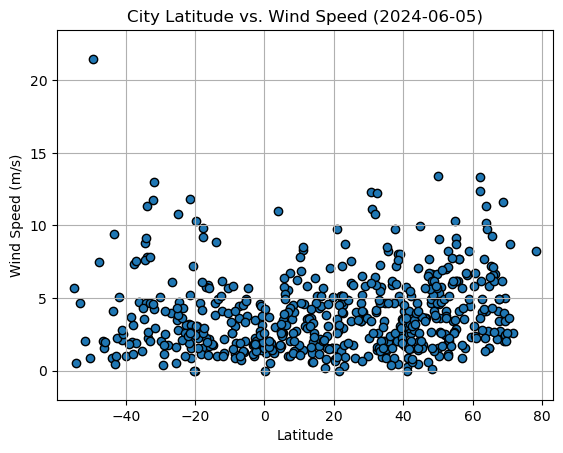

In [24]:
scatter_or_linear_reg_plots(city_data_df["Lat"], city_data_df["Wind Speed"], "Latitude", "Wind Speed (m/s)",
                            plot_name="City Latitude vs. Wind Speed", save_as="output_data/Fig4.png")

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [25]:
# Define a function to create Linear Regression plots
# YOUR CODE HERE
help(city_data_df.loc)

Help on _LocIndexer in module pandas.core.indexing object:

class _LocIndexer(_LocationIndexer)
 |  Access a group of rows and columns by label(s) or a boolean array.
 |  
 |  ``.loc[]`` is primarily label based, but may also be used with a
 |  boolean array.
 |  
 |  Allowed inputs are:
 |  
 |  - A single label, e.g. ``5`` or ``'a'``, (note that ``5`` is
 |    interpreted as a *label* of the index, and **never** as an
 |    integer position along the index).
 |  - A list or array of labels, e.g. ``['a', 'b', 'c']``.
 |  - A slice object with labels, e.g. ``'a':'f'``.
 |  
 |    .. warning:: Note that contrary to usual python slices, **both** the
 |        start and the stop are included
 |  
 |  - A boolean array of the same length as the axis being sliced,
 |    e.g. ``[True, False, True]``.
 |  - An alignable boolean Series. The index of the key will be aligned before
 |    masking.
 |  - An alignable Index. The Index of the returned selection will be the input.
 |  - A ``callable`

In [26]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[(city_data_df['Lat']>=0),:]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,gorom-gorom,14.4439,-0.2361,39.99,26,40,6.37,BF,1717590334
2,west bay,19.3667,-81.4167,29.48,87,20,1.54,KY,1717590334
6,aasiaat,68.7098,-52.8699,-0.29,96,100,3.46,GL,1717590337
7,talnakh,69.4865,88.3972,-2.11,98,100,5.00,RU,1717590337
8,thompson,55.7435,-97.8558,6.09,93,100,6.17,CA,1717590162


In [27]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[(city_data_df['Lat']<0),:]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,chiredzi,-21.0500,31.6667,31.02,6,0,2.78,ZW,1717590333
3,karratha,-20.7377,116.8463,21.71,54,0,3.03,AU,1717590335
4,lebu,-37.6167,-73.6500,13.26,97,100,7.33,CL,1717590335
5,waitangi,-43.9535,-176.5597,7.12,90,83,0.89,NZ,1717590336
11,lukolela,-1.0605,17.1821,28.70,63,91,1.59,CD,1717590339


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.7021349772327472


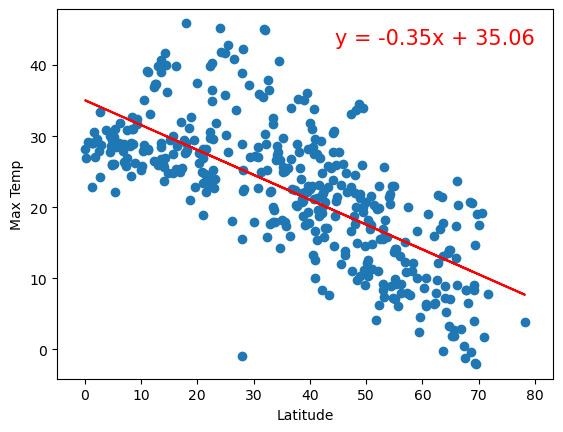

In [110]:
# Linear regression on Northern Hemisphere
scatter_or_linear_reg_plots(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"], "Latitude", "Max Temp", regress=True)

The r-value is: 0.7584501155731074


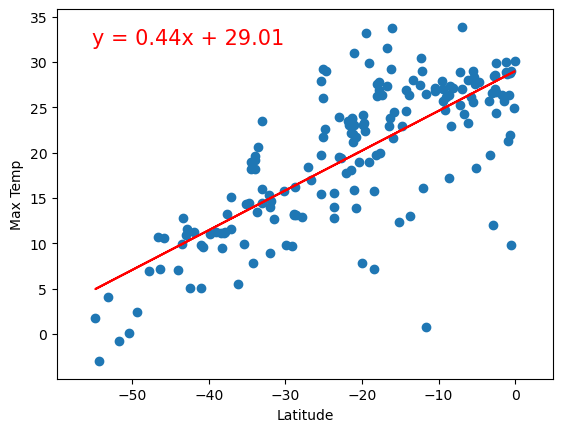

In [111]:
# Linear regression on Southern Hemisphere
scatter_or_linear_reg_plots(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"], "Latitude", "Max Temp", regress=True)

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.003577799057059266


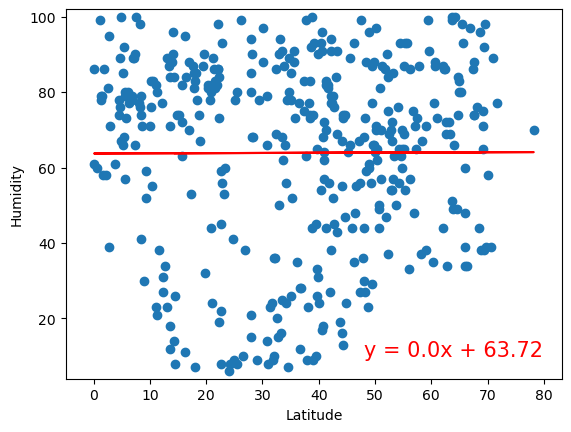

In [112]:
# Northern Hemisphere
scatter_or_linear_reg_plots(northern_hemi_df["Lat"], northern_hemi_df["Humidity"], "Latitude", "Humidity", regress=True)

The r-value is: -0.11745217190209806


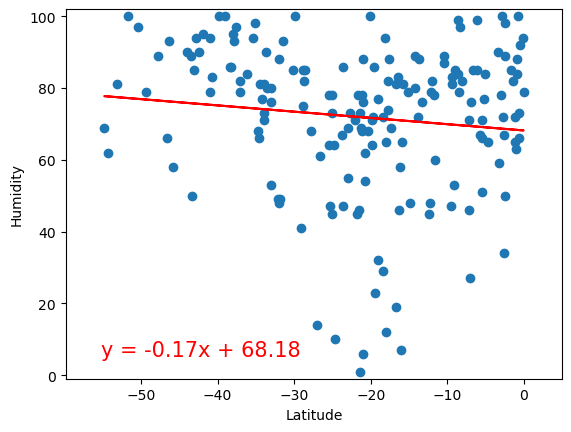

In [113]:
# Southern Hemisphere
scatter_or_linear_reg_plots(southern_hemi_df["Lat"], southern_hemi_df["Humidity"], "Latitude", "Humidity", regress=True)

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.024026517125811015


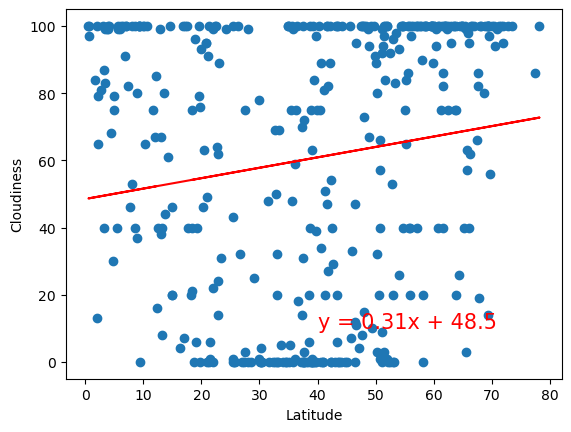

In [19]:
# Northern Hemisphere
# YOUR CODE HERE

The r-value is: 0.02056735429994368


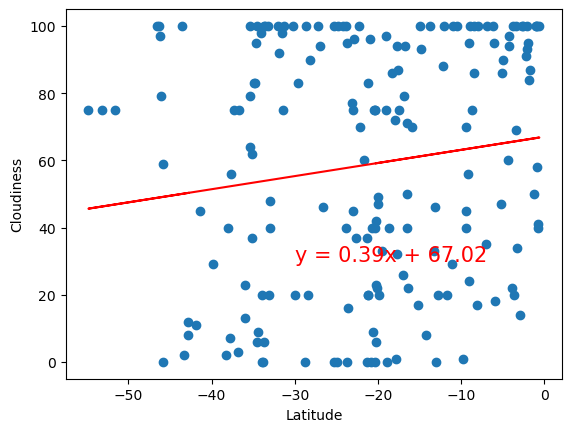

In [20]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.030396762354449467


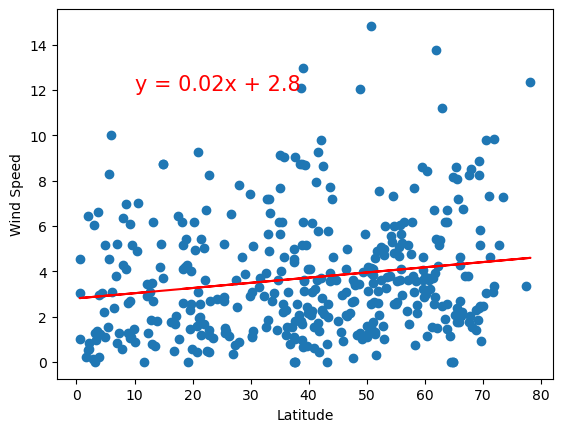

In [21]:
# Northern Hemisphere
# YOUR CODE HERE

The r-value is: 0.062239040700515696


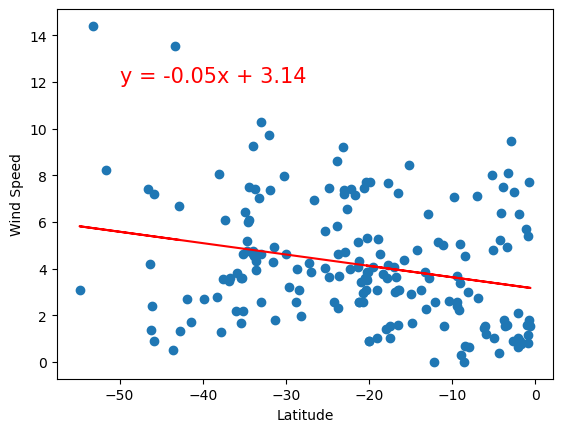

In [22]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE